In [1]:
import sklearn
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
readTrain = pd.read_csv('train.csv')
readTest = pd.read_csv('test.csv')
readDati = pd.read_csv('pokemon.csv')

train = readTrain.copy()
test = readTest.copy()
dati = readDati.copy()

In [3]:
train.dtypes

Winner            int64
First_pokemon     int64
Second_pokemon    int64
dtype: object

In [4]:
dati.columns = dati.columns.str.replace(' ', '')
dati.columns = dati.columns.str.replace('.', '')
dati.drop(['Name'], axis=1, inplace=True)
dati.dtypes

<ipython-input-4-697543c647fd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dati.columns = dati.columns.str.replace('.', '')


#              int64
Type1         object
Type2         object
HP             int64
Attack         int64
Defense        int64
SpAtk          int64
SpDef          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
#Sostituzione caratteri
dati.replace("?", np.nan, inplace=True)
dati.replace(" ", np.nan, inplace=True)
dati.replace("", np.nan, inplace=True)

In [6]:
#Trasformazione di dati non numerici
for d in dati.columns.values:
    if d=='Type1':
        dati[d] = LabelEncoder().fit_transform(dati[d].astype(str))
    if d=='Type2':
        dati[d] = LabelEncoder().fit_transform(dati[d])
    if d=='Legendary':
        dati[d] = LabelEncoder().fit_transform(dati[d])
  

In [7]:
dati.head(70)

,#,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,9,13,45,49,49,65,65,45,1,0
1,2,9,13,60,62,63,80,80,60,1,0
2,3,9,13,80,82,83,100,100,80,1,0
3,4,9,13,80,100,123,122,120,80,1,0
4,5,6,18,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65,66,17,18,40,50,40,40,40,90,1,0
66,67,17,18,65,65,65,50,50,90,1,0
67,68,17,5,90,95,95,70,90,70,1,0
68,69,14,18,25,20,15,105,55,90,1,0


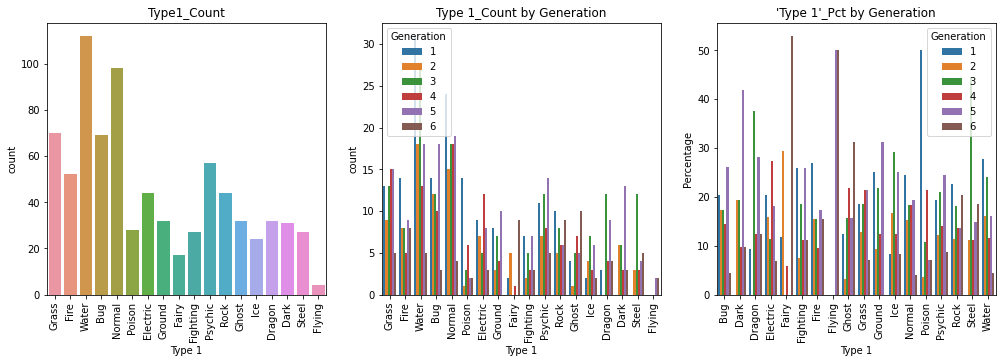

In [8]:
fig, ax=plt.subplots(1,3,figsize=(17,5))
data1=(readDati.groupby('Type 1')["Generation"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
sns.countplot(ax=ax[0],x='Type 1', data=readDati)
ax[0].set_title("Type1_Count")
sns.countplot(ax=ax[1],x='Type 1', data=readDati, hue="Generation")
ax[1].set_title("Type 1_Count by Generation")
sns.barplot(ax=ax[2],x='Type 1', y="Percentage", data=data1, hue="Generation")
ax[2].set_title("'Type 1'_Pct by Generation") 
for i in range(3):
        ax[i].tick_params(axis="x",labelrotation=90)

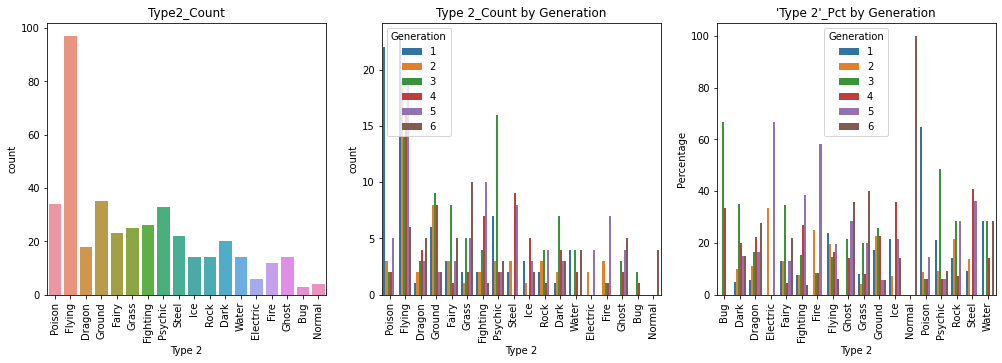

In [9]:
fig, ax=plt.subplots(1,3,figsize=(17,5))
data2=(readDati.groupby('Type 2')["Generation"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
sns.countplot(ax=ax[0],x='Type 2', data=readDati)
ax[0].set_title("Type2_Count")
sns.countplot(ax=ax[1],x='Type 2', data=readDati, hue="Generation")
ax[1].set_title("Type 2_Count by Generation")
sns.barplot(ax=ax[2],x='Type 2', y="Percentage", data=data2, hue="Generation")
ax[2].set_title("'Type 2'_Pct by Generation") 
for i in range(3):
        ax[i].tick_params(axis="x",labelrotation=90)

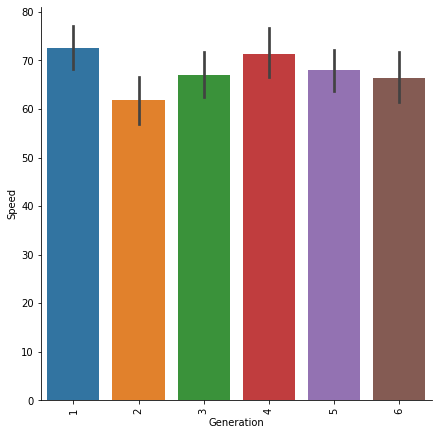

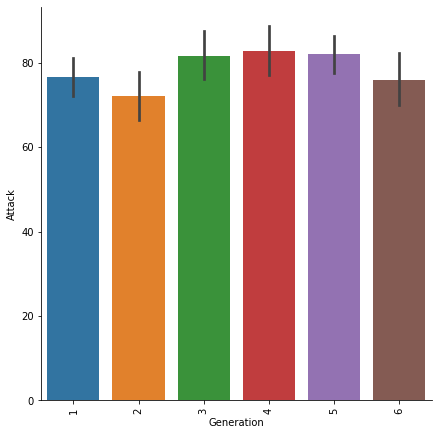

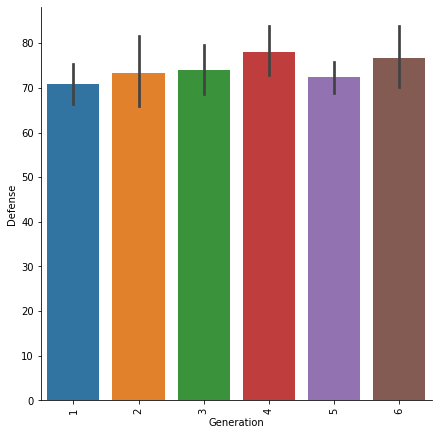

In [10]:
#Possiamo natare, che i valori per generazione rimangono invariati, quindi possiamo rimuoverla come feature
s=sns.catplot(x='Generation', y='Speed', kind='bar', data=dati, height=6)
s.set_xticklabels(rotation=90)
a=sns.catplot(x='Generation', y='Attack', kind='bar', data=dati, height=6)
a.set_xticklabels(rotation=90)
d=sns.catplot(x='Generation', y='Defense', kind='bar', data=dati, height=6)
d.set_xticklabels(rotation=90)

<AxesSubplot:ylabel='#'>

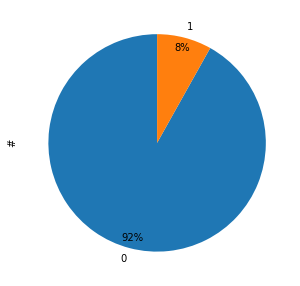

In [11]:
#Percentuale leggendari e non
plt.figure(figsize=(5,5))
dati.groupby(['Legendary'])['#'].count().plot.pie(autopct='%1.0f%%', pctdistance=0.9, labeldistance=1.1, startangle=90)


In [12]:
d1=dati.copy()
d2=dati.copy()
d1.columns = d1.columns.str.replace('#', 'First_pokemon')
d2.columns = d2.columns.str.replace('#', 'Second_pokemon')
result_train=train.merge(d1,on="First_pokemon")
train2=result_train.merge(d2,on='Second_pokemon') #train completo
result_test=test.merge(d1,on="First_pokemon")
test2=result_test.merge(d2,on='Second_pokemon')

In [13]:
train2.head(50)

,Winner,First_pokemon,Second_pokemon,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,SpAtk_x,SpDef_x,...,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,SpAtk_y,SpDef_y,Speed_y,Generation_y,Legendary_y
0,497,492,497,2,10,58,70,45,40,45,...,5,18,40,70,40,35,40,60,4,0
1,132,132,497,14,4,40,45,65,100,120,...,5,18,40,70,40,35,40,60,4,0
2,272,272,497,14,9,100,100,100,100,100,...,5,18,40,70,40,35,40,60,4,0
3,497,309,497,0,7,70,60,62,80,82,...,5,18,40,70,40,35,40,60,4,0
4,731,731,497,6,7,62,73,55,56,52,...,5,18,40,70,40,35,40,60,4,0
5,497,683,497,2,18,77,120,90,60,90,...,5,18,40,70,40,35,40,60,4,0
6,451,451,497,3,18,80,120,79,95,79,...,5,18,40,70,40,35,40,60,4,0
7,497,35,497,13,18,55,47,52,40,40,...,5,18,40,70,40,35,40,60,4,0
8,497,385,497,12,18,60,90,70,60,120,...,5,18,40,70,40,35,40,60,4,0
9,497,385,497,12,18,60,90,70,60,120,...,5,18,40,70,40,35,40,60,4,0


In [14]:
#impostato valori winner 0 se vince il primo e 1 se vince il secondo Pokemon
rig=0
for elem in train2['Winner']:
    if elem==train2['First_pokemon'][rig]:
        train2['Winner'][rig]=0
    else:
        train2['Winner'][rig]=1
    rig=rig+1


<ipython-input-14-6db8186a0718>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Winner'][rig]=1
<ipython-input-14-6db8186a0718>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Winner'][rig]=0


In [15]:
train2.head(50)

,Winner,First_pokemon,Second_pokemon,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,SpAtk_x,SpDef_x,...,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,SpAtk_y,SpDef_y,Speed_y,Generation_y,Legendary_y
0,1,492,497,2,10,58,70,45,40,45,...,5,18,40,70,40,35,40,60,4,0
1,0,132,497,14,4,40,45,65,100,120,...,5,18,40,70,40,35,40,60,4,0
2,0,272,497,14,9,100,100,100,100,100,...,5,18,40,70,40,35,40,60,4,0
3,1,309,497,0,7,70,60,62,80,82,...,5,18,40,70,40,35,40,60,4,0
4,0,731,497,6,7,62,73,55,56,52,...,5,18,40,70,40,35,40,60,4,0
5,1,683,497,2,18,77,120,90,60,90,...,5,18,40,70,40,35,40,60,4,0
6,0,451,497,3,18,80,120,79,95,79,...,5,18,40,70,40,35,40,60,4,0
7,1,35,497,13,18,55,47,52,40,40,...,5,18,40,70,40,35,40,60,4,0
8,1,385,497,12,18,60,90,70,60,120,...,5,18,40,70,40,35,40,60,4,0
9,1,385,497,12,18,60,90,70,60,120,...,5,18,40,70,40,35,40,60,4,0


In [16]:
rig=0
for elem in test2['Winner']:
    if elem==test2['First_pokemon'][rig]:
        test2['Winner'][rig]=0
    else:
        test2['Winner'][rig]=1
    rig=rig+1

<ipython-input-16-64cd235d2f75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Winner'][rig]=0
<ipython-input-16-64cd235d2f75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Winner'][rig]=1


<AxesSubplot:>

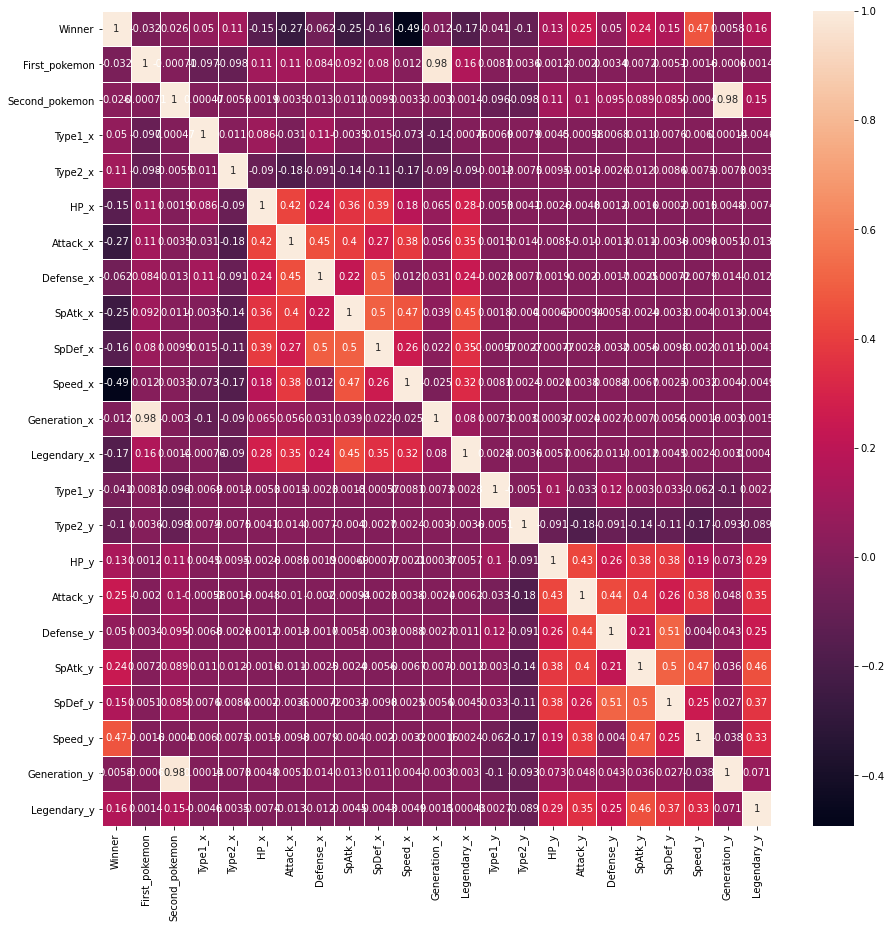

In [17]:
corr = train2.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, linewidths=.5, ax=ax)

In [18]:
#Mediante il grafico sovrastante si è potuto veirficare quali feature abbiano una bassa correlazione e quindi quali rimuovere
#per l'addestramento. In questo caso si è pensato di rimuovere Generation, Type_1, Type_2.

In [19]:
features = ['HP_x', 'Attack_x', 'Defense_x', 'SpAtk_x', 'SpDef_x', 'Speed_x','Legendary_x', 'HP_y', 'Attack_y', 'Defense_y', 'SpAtk_y', 'SpDef_y', 'Speed_y','Legendary_y']

X=train2[features]
Y=train2['Winner']
X_test=test2[features]
Y_test=test2['Winner']

In [20]:
model = RandomForestClassifier(random_state = 50) 
model.fit(X, Y)

RandomForestClassifier(random_state=50)

In [22]:
train_pred = model.predict(X)
train_acc=metrics.accuracy_score(Y,train_pred)
print('Train: %s'% train_acc)

Train: 1.0


In [23]:
test_pred = model.predict(X_test)
test_acc=metrics.accuracy_score(Y_test,test_pred)
print('Test: %s' % test_acc)

Test: 0.945
